# Contrat de Maintenance du Modèle KMeans

Ce notebook présente la procédure de maintenance du modèle KMeans avec 4 clusters, en utilisant les caractéristiques RFM et le score de révision des clients. Le modèle initial est entraîné sur les données jusqu'au 31/12/2017, puis utilisé pour prédire les clusters sur l'année 2018, en ajoutant des données par pas de deux semaines. À chaque pas, un nouveau modèle est entraîné et l'ARI est calculé entre le modèle initial et le nouveau modèle.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Filtrer les données pour l'année 2017
cutoff_date = datetime.strptime('2017-12-31', '%Y-%m-%d')
initial_data = customer_data[customer_data['last_order'] <= cutoff_date]

# Vérifier les dates minimales et maximales
print("Date minimale des commandes initiales:", initial_data['last_order'].min())
print("Date maximale des commandes initiales:", initial_data['last_order'].max())

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données pour l'année 2017
initial_features = prepare_data(initial_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
initial_features = initial_features.fillna(initial_features.mean())

# Standard scaling
scaler = StandardScaler()
initial_features_scaled = scaler.fit_transform(initial_features)

# Entraîner le modèle initial (modèle 0)
kmeans_model_0 = KMeans(n_clusters=4, random_state=42)
kmeans_model_0.fit(initial_features_scaled)
initial_labels = kmeans_model_0.labels_

# Afficher les centres des clusters
print("Centres des clusters du modèle 0:")
print(kmeans_model_0.cluster_centers_)

Date minimale des commandes initiales: 2016-09-04 21:15:19
Date maximale des commandes initiales: 2017-12-30 23:53:28
Centres des clusters du modèle 0:
[[-0.03060197 -0.12467131  0.1209997  -1.95075337]
 [-0.30242585  7.56090663  0.73447064  0.12406658]
 [ 1.05370657 -0.12467131 -0.02318439  0.38661117]
 [-0.70130599 -0.12467131 -0.05034009  0.40240938]]


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:27: SettingWithCopyWarning: 
A value is trying to be set on 

In [6]:
from datetime import timedelta

# Ajouter 2 semaines à la période initiale
extended_cutoff_date = cutoff_date + timedelta(weeks=2)

# Filtrer les données pour la période initiale + 2 semaines
# extended_data = customer_data[(customer_data['last_order'] > cutoff_date) & (customer_data['last_order'] <= extended_cutoff_date)]
extended_data = customer_data[(customer_data['last_order'] <= extended_cutoff_date)]

# Vérifier les dates minimales et maximales pour la période étendue
print("Date minimale des commandes étendues:", extended_data['last_order'].min())
print("Date maximale des commandes étendues:", extended_data['last_order'].max())

# Préparer les données pour la période initiale + 2 semaines
extended_features = prepare_data(extended_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
extended_features = extended_features.fillna(extended_features.mean())

# Utiliser le scaler initial pour transformer les nouvelles données
extended_features_scaled = scaler.transform(extended_features)

# Prédire les clusters avec le modèle initial
extended_labels = kmeans_model_0.predict(extended_features_scaled)

# Afficher les clusters prédits
print("Clusters prédits pour la période initiale + 2 semaines:")
print(extended_labels)

Date minimale des commandes étendues: 2016-09-04 21:15:19
Date maximale des commandes étendues: 2018-01-13 23:58:01
Clusters prédits pour la période initiale + 2 semaines:
[2 3 3 ... 3 2 2]


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:27: SettingWithCopyWarning: 
A value is trying to be set on 

In [7]:
from sklearn.metrics import adjusted_rand_score

# Préparer les données pour la période initiale + 2 semaines
extended_features = prepare_data(extended_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
extended_features = extended_features.fillna(extended_features.mean())

# Nouveau standard scaling pour les nouvelles données
scaler_new = StandardScaler()
extended_features_scaled_new = scaler_new.fit_transform(extended_features)

# Entraîner un nouveau modèle sur les nouvelles données
kmeans_model_n = KMeans(n_clusters=4, random_state=42)
kmeans_model_n.fit(extended_features_scaled_new)
new_model_labels = kmeans_model_n.labels_

# Utiliser le scaler initial pour transformer les nouvelles données
extended_features_scaled_initial = scaler.transform(extended_features)

# Prédire les clusters avec le modèle initial
initial_model_labels = kmeans_model_0.predict(extended_features_scaled_initial)

# Calculer l'ARI entre le modèle initial et le nouveau modèle
ari = adjusted_rand_score(initial_model_labels, new_model_labels)

# Afficher les résultats
print(f"Score ARI entre le modèle initial et le nouveau modèle: {ari:.4f}")

Score ARI entre le modèle initial et le nouveau modèle: 0.9535


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_9499/1665656843.py:27: SettingWithCopyWarning: 
A value is trying to be set on 

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Définir les périodes
cutoff_date = datetime.strptime('2017-12-31', '%Y-%m-%d')

# Filtrer les données pour l'année 2017
initial_data = customer_data[customer_data['last_order'] <= cutoff_date]

# Afficher la date de fin du dataframe initial
print("Date de fin du dataframe initial:", initial_data['last_order'].max())

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données pour l'année 2017
initial_features = prepare_data(initial_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
initial_features = initial_features.fillna(initial_features.mean())

# Standard scaling pour le modèle initial
scaler_initial = StandardScaler()
initial_features_scaled = scaler_initial.fit_transform(initial_features)

# Entraîner le modèle initial (modèle 0)
kmeans_model_0 = KMeans(n_clusters=4, random_state=42)
kmeans_model_0.fit(initial_features_scaled)
initial_labels = kmeans_model_0.labels_

Date de fin du dataframe initial: 2017-12-30 23:53:28


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 2 semaines: 2018-01-13 23:58:01
Date de fin des données étendues pour 4 semaines: 2018-01-27 23:39:20


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 6 semaines: 2018-02-10 23:59:54
Date de fin des données étendues pour 8 semaines: 2018-02-24 23:49:37


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 10 semaines: 2018-03-10 23:56:56
Date de fin des données étendues pour 12 semaines: 2018-03-24 22:42:56
Date de fin des données étendues pour 14 semaines: 2018-04-07 23:57:34


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 16 semaines: 2018-04-21 23:25:36
Date de fin des données étendues pour 18 semaines: 2018-05-05 23:54:00
Date de fin des données étendues pour 20 semaines: 2018-05-19 23:44:09


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 22 semaines: 2018-06-02 23:42:33
Date de fin des données étendues pour 24 semaines: 2018-06-16 23:42:25


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 26 semaines: 2018-06-30 23:59:49
Date de fin des données étendues pour 28 semaines: 2018-07-14 23:54:09


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 30 semaines: 2018-07-28 23:38:18
Date de fin des données étendues pour 32 semaines: 2018-08-11 23:56:26


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 34 semaines: 2018-08-25 23:39:08
Date de fin des données étendues pour 36 semaines: 2018-09-06 18:45:47


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 38 semaines: 2018-09-20 13:54:16
Date de fin des données étendues pour 40 semaines: 2018-10-03 18:55:29


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 42 semaines: 2018-10-17 17:30:18


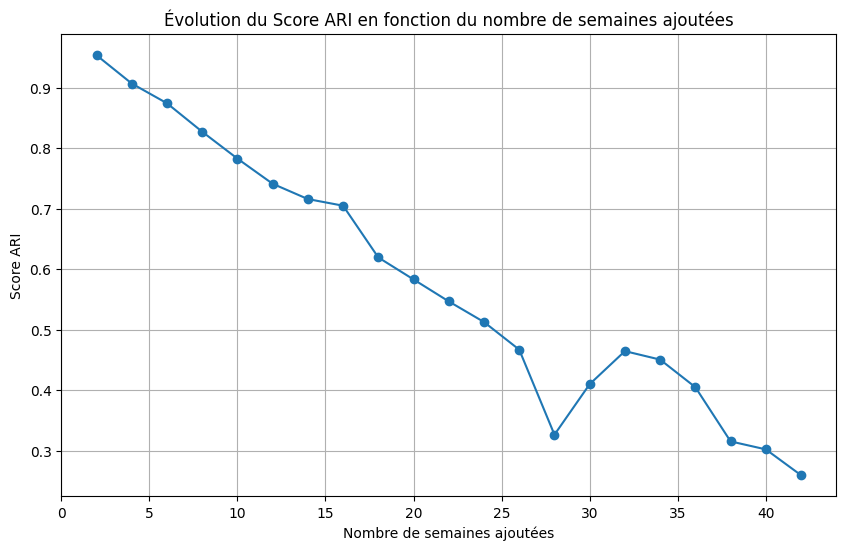

Semaine 2: ARI = 0.9535
Semaine 4: ARI = 0.9067
Semaine 6: ARI = 0.8741
Semaine 8: ARI = 0.8270
Semaine 10: ARI = 0.7826
Semaine 12: ARI = 0.7410
Semaine 14: ARI = 0.7157
Semaine 16: ARI = 0.7047
Semaine 18: ARI = 0.6192
Semaine 20: ARI = 0.5828
Semaine 22: ARI = 0.5465
Semaine 24: ARI = 0.5124
Semaine 26: ARI = 0.4667
Semaine 28: ARI = 0.3262
Semaine 30: ARI = 0.4097
Semaine 32: ARI = 0.4643
Semaine 34: ARI = 0.4503
Semaine 36: ARI = 0.4047
Semaine 38: ARI = 0.3151
Semaine 40: ARI = 0.3019
Semaine 42: ARI = 0.2592


In [20]:
# Liste pour stocker les scores ARI
ari_scores = []

# Boucle pour ajouter des données par pas de deux semaines et calculer l'ARI
num_steps = 26  # Pour une année entière
for step in range(1, num_steps + 1):
    # Ajouter des données pour les deux semaines courantes
    extended_cutoff_date = cutoff_date + timedelta(weeks=step*2)
    extended_data = customer_data[customer_data['last_order'] <= extended_cutoff_date]
        
    if extended_data['last_order'].max() <= cutoff_date + timedelta(weeks=(step-1)*2):
        break
    
    # Afficher la date de fin des données étendues
    print(f"Date de fin des données étendues pour {step*2} semaines:", extended_data['last_order'].max())
    
    # Préparer les données pour la période étendue
    extended_features = prepare_data(extended_data)
    extended_features = extended_features.fillna(extended_features.mean())  # Gérer les valeurs manquantes
    
    # Nouveau standard scaling pour les nouvelles données
    scaler_new = StandardScaler()
    extended_features_scaled_new = scaler_new.fit_transform(extended_features)
    
    # Entraîner un nouveau modèle sur les nouvelles données
    kmeans_model_n = KMeans(n_clusters=4, random_state=42)
    kmeans_model_n.fit(extended_features_scaled_new)
    new_model_labels = kmeans_model_n.labels_
    
    # Utiliser le scaler initial pour transformer les nouvelles données
    extended_features_scaled_initial = scaler_initial.transform(extended_features)
    
    # Prédire les clusters avec le modèle initial
    initial_model_labels = kmeans_model_0.predict(extended_features_scaled_initial)
    
    # Calculer l'ARI entre le modèle initial et le nouveau modèle
    ari = adjusted_rand_score(initial_model_labels, new_model_labels)
    ari_scores.append(ari)

# Tracer l'évolution de l'ARI en fonction du nombre de semaines ajoutées
plt.figure(figsize=(10, 6))
plt.plot(2 * np.arange(1, len(ari_scores) + 1), ari_scores, marker='o')
plt.xlabel('Nombre de semaines ajoutées')
plt.ylabel('Score ARI')
plt.title('Évolution du Score ARI en fonction du nombre de semaines ajoutées')
plt.grid(True)
plt.show()

# Afficher les scores ARI
for i, score in enumerate(ari_scores):
    print(f"Semaine {2+i*2}: ARI = {score:.4f}")

In [18]:
len(ari_scores)

25

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

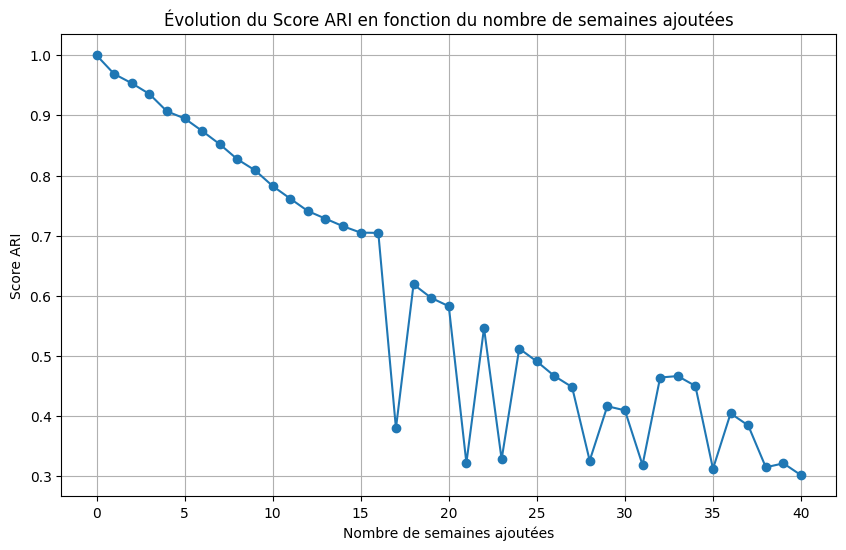

Semaine 0: ARI = 1.0000
Semaine 1: ARI = 0.9689
Semaine 2: ARI = 0.9535
Semaine 3: ARI = 0.9356
Semaine 4: ARI = 0.9067
Semaine 5: ARI = 0.8950
Semaine 6: ARI = 0.8741
Semaine 7: ARI = 0.8520
Semaine 8: ARI = 0.8270
Semaine 9: ARI = 0.8087
Semaine 10: ARI = 0.7826
Semaine 11: ARI = 0.7616
Semaine 12: ARI = 0.7410
Semaine 13: ARI = 0.7283
Semaine 14: ARI = 0.7157
Semaine 15: ARI = 0.7051
Semaine 16: ARI = 0.7047
Semaine 17: ARI = 0.3800
Semaine 18: ARI = 0.6192
Semaine 19: ARI = 0.5967
Semaine 20: ARI = 0.5828
Semaine 21: ARI = 0.3224
Semaine 22: ARI = 0.5465
Semaine 23: ARI = 0.3283
Semaine 24: ARI = 0.5124
Semaine 25: ARI = 0.4910
Semaine 26: ARI = 0.4667
Semaine 27: ARI = 0.4485
Semaine 28: ARI = 0.3262
Semaine 29: ARI = 0.4166
Semaine 30: ARI = 0.4097
Semaine 31: ARI = 0.3189
Semaine 32: ARI = 0.4643
Semaine 33: ARI = 0.4667
Semaine 34: ARI = 0.4503
Semaine 35: ARI = 0.3126
Semaine 36: ARI = 0.4047
Semaine 37: ARI = 0.3847
Semaine 38: ARI = 0.3151
Semaine 39: ARI = 0.3217
Semaine 40

In [22]:
# Liste pour stocker les scores ARI
ari_scores = []

# Boucle pour ajouter des données par pas de deux semaines et calculer l'ARI
num_steps = 52
for step in range(0, num_steps):
    # Ajouter des données pour les deux semaines courantes
    extended_cutoff_date = cutoff_date + timedelta(weeks=step)
    extended_data = customer_data[customer_data['last_order'] <= extended_cutoff_date]
        
    if extended_data['last_order'].max() <= cutoff_date + timedelta(weeks=(step-1)):
        break
    
    # Afficher la date de fin des données étendues
    # print(f"Date de fin des données étendues pour {step} semaines:", extended_data['last_order'].max())
    
    # Préparer les données pour la période étendue
    extended_features = prepare_data(extended_data)
    extended_features = extended_features.fillna(extended_features.mean())  # Gérer les valeurs manquantes
    
    # Nouveau standard scaling pour les nouvelles données
    scaler_new = StandardScaler()
    extended_features_scaled_new = scaler_new.fit_transform(extended_features)
    
    # Entraîner un nouveau modèle sur les nouvelles données
    kmeans_model_n = KMeans(n_clusters=4, random_state=42)
    kmeans_model_n.fit(extended_features_scaled_new)
    new_model_labels = kmeans_model_n.labels_
    
    # Utiliser le scaler initial pour transformer les nouvelles données
    extended_features_scaled_initial = scaler_initial.transform(extended_features)
    
    # Prédire les clusters avec le modèle initial
    initial_model_labels = kmeans_model_0.predict(extended_features_scaled_initial)
    
    # Calculer l'ARI entre le modèle initial et le nouveau modèle
    ari = adjusted_rand_score(initial_model_labels, new_model_labels)
    ari_scores.append(ari)

# Tracer l'évolution de l'ARI en fonction du nombre de semaines ajoutées
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(ari_scores)), ari_scores, marker='o')
#plt.xlim([0, 24])
plt.xlabel('Nombre de semaines ajoutées')
plt.ylabel('Score ARI')
plt.title('Évolution du Score ARI en fonction du nombre de semaines ajoutées')
plt.grid(True)
plt.show()

# Afficher les scores ARI
for i, score in enumerate(ari_scores):
    print(f"Semaine {i}: ARI = {score:.4f}")

Date de fin des données étendues pour 0 semaines: 2017-12-30 23:53:28
Date de fin des données étendues pour 2 semaines: 2018-01-13 23:58:01
Date de fin des données étendues pour 4 semaines: 2018-01-27 23:39:20
Date de fin des données étendues pour 6 semaines: 2018-02-10 23:59:54


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 8 semaines: 2018-02-24 23:49:37
Date de fin des données étendues pour 10 semaines: 2018-03-10 23:56:56
Date de fin des données étendues pour 12 semaines: 2018-03-24 22:42:56


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 14 semaines: 2018-04-07 23:57:34
Date de fin des données étendues pour 16 semaines: 2018-04-21 23:25:36
Date de fin des données étendues pour 18 semaines: 2018-05-05 23:54:00


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 20 semaines: 2018-05-19 23:44:09
Date de fin des données étendues pour 22 semaines: 2018-06-02 23:42:33


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/469504772.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

Date de fin des données étendues pour 24 semaines: 2018-06-16 23:42:25


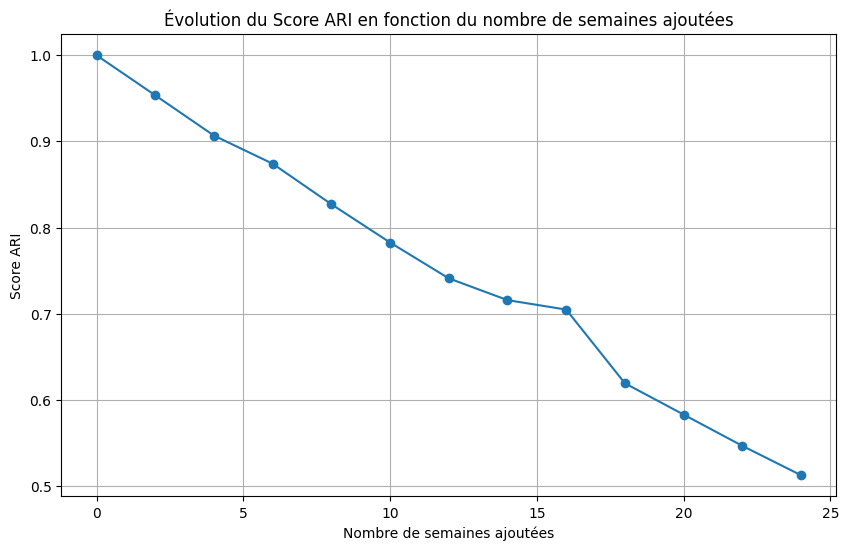

Semaine 2: ARI = 1.0000
Semaine 4: ARI = 0.9535
Semaine 6: ARI = 0.9067
Semaine 8: ARI = 0.8741
Semaine 10: ARI = 0.8270
Semaine 12: ARI = 0.7826
Semaine 14: ARI = 0.7410
Semaine 16: ARI = 0.7157
Semaine 18: ARI = 0.7047
Semaine 20: ARI = 0.6192
Semaine 22: ARI = 0.5828
Semaine 24: ARI = 0.5465
Semaine 26: ARI = 0.5124


In [27]:
# Liste pour stocker les scores ARI
ari_scores = []

# Boucle pour ajouter des données par pas de deux semaines et calculer l'ARI
num_steps = 12  # Pour une année entière
for step in range(0, num_steps + 1):
    # Ajouter des données pour les deux semaines courantes
    extended_cutoff_date = cutoff_date + timedelta(weeks=step*2)
    extended_data = customer_data[customer_data['last_order'] <= extended_cutoff_date]
        
    if extended_data['last_order'].max() <= cutoff_date + timedelta(weeks=(step-1)*2):
        break
    
    # Afficher la date de fin des données étendues
    print(f"Date de fin des données étendues pour {step*2} semaines:", extended_data['last_order'].max())
    
    # Préparer les données pour la période étendue
    extended_features = prepare_data(extended_data)
    extended_features = extended_features.fillna(extended_features.mean())  # Gérer les valeurs manquantes
    
    # Nouveau standard scaling pour les nouvelles données
    scaler_new = StandardScaler()
    extended_features_scaled_new = scaler_new.fit_transform(extended_features)
    
    # Entraîner un nouveau modèle sur les nouvelles données
    kmeans_model_n = KMeans(n_clusters=4, random_state=42)
    kmeans_model_n.fit(extended_features_scaled_new)
    new_model_labels = kmeans_model_n.labels_
    
    # Utiliser le scaler initial pour transformer les nouvelles données
    extended_features_scaled_initial = scaler_initial.transform(extended_features)
    
    # Prédire les clusters avec le modèle initial
    initial_model_labels = kmeans_model_0.predict(extended_features_scaled_initial)
    
    # Calculer l'ARI entre le modèle initial et le nouveau modèle
    ari = adjusted_rand_score(initial_model_labels, new_model_labels)
    ari_scores.append(ari)

# Tracer l'évolution de l'ARI en fonction du nombre de semaines ajoutées
plt.figure(figsize=(10, 6))
plt.plot(2 * np.arange(0, len(ari_scores)), ari_scores, marker='o')
plt.xlabel('Nombre de semaines ajoutées')
plt.ylabel('Score ARI')
plt.title('Évolution du Score ARI en fonction du nombre de semaines ajoutées')
plt.grid(True)
plt.show()

# Afficher les scores ARI
for i, score in enumerate(ari_scores):
    print(f"Semaine {2+i*2}: ARI = {score:.4f}")

Date de fin du dataframe initial: 2017-12-30 23:53:28
Date de fin des données étendues pour 0 semaines: 2017-12-30 23:53:28
Date de fin des données étendues pour 2 semaines: 2018-01-27 23:39:20
Date de fin des données étendues pour 4 semaines: 2018-02-24 23:49:37
Date de fin des données étendues pour 6 semaines: 2018-03-24 22:42:56


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/1354343248.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/1354343248.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/1354343248.py:30: SettingWithCopyWarning: 
A value is trying to be set 

Date de fin des données étendues pour 8 semaines: 2018-04-21 23:25:36
Date de fin des données étendues pour 10 semaines: 2018-05-19 23:44:09
Date de fin des données étendues pour 12 semaines: 2018-06-16 23:42:25


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/1354343248.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_order'] = pd.to_datetime(data['last_order'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/1354343248.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency'] = (current_date - data['last_order']).dt.days
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_81472/1354343248.py:30: SettingWithCopyWarning: 
A value is trying to be set 

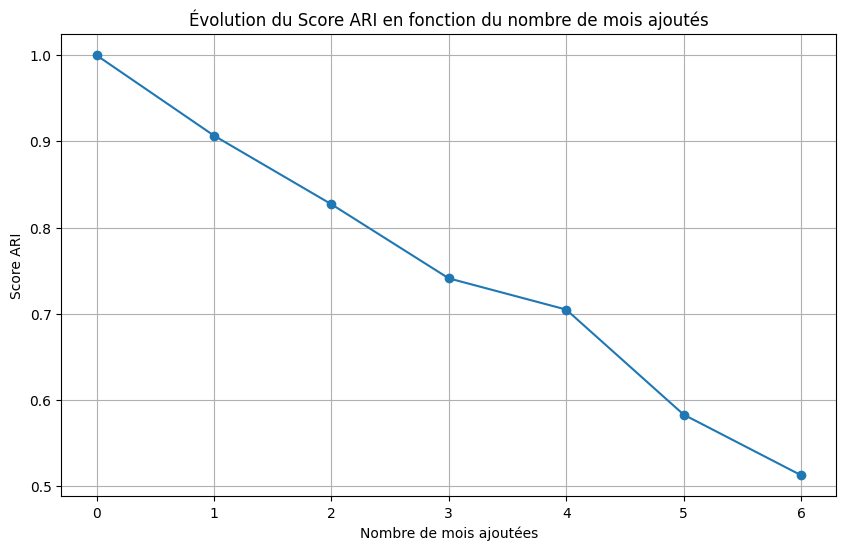

Mois 0: ARI = 1.0000
Mois 1: ARI = 0.9067
Mois 2: ARI = 0.8270
Mois 3: ARI = 0.7410
Mois 4: ARI = 0.7047
Mois 5: ARI = 0.5828
Mois 6: ARI = 0.5124


In [31]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Définir les périodes
cutoff_date = datetime.strptime('2017-12-31', '%Y-%m-%d')

# Filtrer les données pour l'année 2017
initial_data = customer_data[customer_data['last_order'] <= cutoff_date]

# Afficher la date de fin du dataframe initial
print("Date de fin du dataframe initial:", initial_data['last_order'].max())

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données pour l'année 2017
initial_features = prepare_data(initial_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
initial_features = initial_features.fillna(initial_features.mean())

# Standard scaling pour le modèle initial
scaler_initial = StandardScaler()
initial_features_scaled = scaler_initial.fit_transform(initial_features)

# Entraîner le modèle initial (modèle 0)
kmeans_model_0 = KMeans(n_clusters=4, random_state=42)
kmeans_model_0.fit(initial_features_scaled)
initial_labels = kmeans_model_0.labels_

# Liste pour stocker les scores ARI
ari_scores = []

# Boucle pour ajouter des données par pas de deux semaines et calculer l'ARI
num_steps = 6  # Pour une année entière
for step in range(0, num_steps + 1):
    # Ajouter des données pour les deux semaines courantes
    extended_cutoff_date = cutoff_date + timedelta(weeks=step*4)
    extended_data = customer_data[customer_data['last_order'] <= extended_cutoff_date]
        
    if extended_data['last_order'].max() <= cutoff_date + timedelta(weeks=(step-1)*4):
        break
    
    # Afficher la date de fin des données étendues
    print(f"Date de fin des données étendues pour {step*2} semaines:", extended_data['last_order'].max())
    
    # Préparer les données pour la période étendue
    extended_features = prepare_data(extended_data)
    extended_features = extended_features.fillna(extended_features.mean())  # Gérer les valeurs manquantes
    
    # Nouveau standard scaling pour les nouvelles données
    scaler_new = StandardScaler()
    extended_features_scaled_new = scaler_new.fit_transform(extended_features)
    
    # Entraîner un nouveau modèle sur les nouvelles données
    kmeans_model_n = KMeans(n_clusters=4, random_state=42)
    kmeans_model_n.fit(extended_features_scaled_new)
    new_model_labels = kmeans_model_n.labels_
    
    # Utiliser le scaler initial pour transformer les nouvelles données
    extended_features_scaled_initial = scaler_initial.transform(extended_features)
    
    # Prédire les clusters avec le modèle initial
    initial_model_labels = kmeans_model_0.predict(extended_features_scaled_initial)
    
    # Calculer l'ARI entre le modèle initial et le nouveau modèle
    ari = adjusted_rand_score(initial_model_labels, new_model_labels)
    ari_scores.append(ari)

# Tracer l'évolution de l'ARI en fonction du nombre de semaines ajoutées
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(ari_scores)), ari_scores, marker='o')
plt.xlabel('Nombre de mois ajoutées')
plt.ylabel('Score ARI')
plt.title('Évolution du Score ARI en fonction du nombre de mois ajoutés')
plt.grid(True)
plt.show()

# Afficher les scores ARI
for i, score in enumerate(ari_scores):
    print(f"Mois {i}: ARI = {score:.4f}")